<a href="https://colab.research.google.com/github/vtttuyen/DataAnalystDeepLearning1/blob/main/lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import sys
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
def load_data(filename):
  return pd.read_csv('https://raw.githubusercontent.com/huynhhoc/DataAnalystDeepLearning/main/Data/covid19/'+filename)
dfcovid19 = load_data('countriessample.csv')
dfcovid19.head()

,Date,CountryRegion,Confirmed,Recovered,Deaths
0,1/22/2020,Ghana;Africa,NaN,NaN,0.0
1,1/22/2020,Greece;Europe,NaN,NaN,0.0
2,1/22/2020,Iceland;Europe,0.0,NaN,0.0
3,1/22/2020,India;Asia,0.0,NaN,0.0
4,1/22/2020,Indonesia;Asia,0.0,NaN,0.0




Example 1:

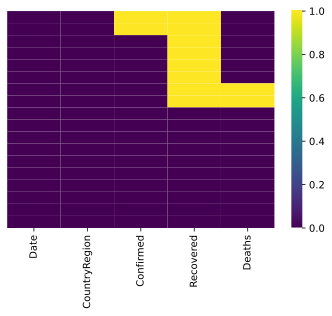

In [3]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
sns.heatmap(dfcovid19.isna(), 
            yticklabels=False, 
            cbar=True, 
            cmap='viridis')


Example 2:Apply a function to each column of the dataframe (source: https://datascienceparichay.com/article/apply-a-function-to-a-pandas-dataframe/)

In [4]:
import pandas as pd

# create a sample dataframe
df = pd.DataFrame({
    'History': [76, 84, 68, 94],
    'Math': [81, 67, 91, 86],
    'English': [72, 93, 84, 76]
})

# print the dataframe
print("The original dataframe:\n")
print(df)

# function to be applied
def get_mean(scores):
    return sum(scores)/len(scores)

# get the mean score for each subject
result = df.apply(get_mean)
print("\nThe result of applying the function on the dataframe:\n")
print(result)

The original dataframe:

   History  Math  English
0       76    81       72
1       84    67       93
2       68    91       84
3       94    86       76

The result of applying the function on the dataframe:

History    80.50
Math       81.25
English    81.25
dtype: float64


Example 3: Apply a function to each row (axis = 1) of the dataframe

In [5]:
import pandas as pd

# create a sample dataframe
df = pd.DataFrame({
    'History': [76, 84, 68, 94],
    'Math': [81, 67, 91, 86],
    'English': [72, 93, 84, 76]
}, index=['Sam', 'Greta', 'Mike', 'Emma'])

# print the dataframe
print("The original dataframe:\n")
print(df)

# function to be applied
def get_mean(scores):
    return sum(scores)/len(scores)

# get the mean score for each student
result = df.apply(get_mean, axis=1)
print("\nThe result of applying the function on the dataframe:\n")
print(result)

The original dataframe:

       History  Math  English
Sam         76    81       72
Greta       84    67       93
Mike        68    91       84
Emma        94    86       76

The result of applying the function on the dataframe:

Sam      76.333333
Greta    81.333333
Mike     81.000000
Emma     85.333333
dtype: float64


Example 4: Define function to split CountryRegion into country and region

In [6]:
def split_name_series(string):
  country, region=string.split(';')
  return pd.Series(
      (country, region),
      index='country, region'.split()
  )

In [7]:
def split_name(x_df):
    # Select the Name column and apply a function
    res=x_df['CountryRegion'].apply(split_name_series)
    x_df[res.columns]=res
    return x_df




Example 5: Split CountryRegion into country and region by using slip_name function in example 4

In [8]:
res=load_data('countriessample.csv').pipe(split_name)
res

,Date,CountryRegion,Confirmed,Recovered,Deaths,"country,",region
0,1/22/2020,Ghana;Africa,NaN,NaN,0.0,Ghana,Africa
1,1/22/2020,Greece;Europe,NaN,NaN,0.0,Greece,Europe
2,1/22/2020,Iceland;Europe,0.0,NaN,0.0,Iceland,Europe
3,1/22/2020,India;Asia,0.0,NaN,0.0,India,Asia
4,1/22/2020,Indonesia;Asia,0.0,NaN,0.0,Indonesia,Asia
5,1/22/2020,Iran;Asia,0.0,NaN,0.0,Iran,Asia
6,1/22/2020,Iraq;Asia,0.0,NaN,NaN,Iraq,Asia
7,1/22/2020,Ireland;Europe,0.0,NaN,NaN,Ireland,Europe
8,6/6/2020,Guinea;Africa,4117.0,2857.0,23.0,Guinea,Africa
9,6/6/2020,Guyana;South America,154.0,80.0,12.0,Guyana,South America




Example 6:

In [11]:
def substitute_region(x_df):
    mapping={'Africa':'AF', 'Asia':'AS','Europe':'EU','South America':'SA','North America':'NA'}
    x_df['region']=x_df['region'].map(mapping)
    return x_df

In [17]:
res=(res.pipe(substitute_region))
res 

,Date,CountryRegion,Confirmed,Recovered,Deaths,"country,",region
0,1/22/2020,Ghana;Africa,NaN,NaN,0.0,Ghana,NaN
1,1/22/2020,Greece;Europe,NaN,NaN,0.0,Greece,NaN
2,1/22/2020,Iceland;Europe,0.0,NaN,0.0,Iceland,NaN
3,1/22/2020,India;Asia,0.0,NaN,0.0,India,NaN
4,1/22/2020,Indonesia;Asia,0.0,NaN,0.0,Indonesia,NaN
5,1/22/2020,Iran;Asia,0.0,NaN,0.0,Iran,NaN
6,1/22/2020,Iraq;Asia,0.0,NaN,NaN,Iraq,NaN
7,1/22/2020,Ireland;Europe,0.0,NaN,NaN,Ireland,NaN
8,6/6/2020,Guinea;Africa,4117.0,2857.0,23.0,Guinea,NaN
9,6/6/2020,Guyana;South America,154.0,80.0,12.0,Guyana,NaN
